In [1]:
# Importación de las librerías Pandas, Numpy y Scikit-Learn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import linear_model as sklm


from sklearn import model_selection as skmodsel
from sklearn import metrics as skmet
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
set_config(display="diagram")
labelencoder = LabelEncoder()

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv("Macro4.csv", encoding='latin1', sep=';')

In [4]:
df

anio               Nombre ciiu_n1  \
0      2018         ASEFICA S.A.       K   
1      2019         ASEFICA S.A.       K   
2      2020         ASEFICA S.A.       K   
3      2021         ASEFICA S.A.       K   
4      2022         ASEFICA S.A.       K   
...     ...                  ...     ...   
33205  2021  ZURIKATTA CIA.LTDA.       J   
33206  2022  ZURIKATTA CIA.LTDA.       J   
33207  2020      ZWIPPETECH S.A.       J   
33208  2022  ZYGOO S.A.S. B.I.C.       J   
33209  2022            #¿NOMBRE?       J   

                                Descripcion1  Región  PIB_porcentual  \
0      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
1      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
2      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
3      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
4      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
...                                      ...     ...             ...   
33205            INFORMACIÓN Y COMUNICACIÓN.  SIERRA             0.0   
33206            INFORMACIÓN Y COMUNICACIÓN.  SIERRA             0.0   
33207            INFORMACIÓN Y COMUNICACIÓN.  SIERRA             0.0   
33208            INFORMACIÓN Y COMUNICACIÓN.   COSTA             0.0   
33209            INFORMACIÓN Y COMUNICACIÓN.  SIERRA             0.0   

       PIB_miles    activos  patrimonio  n_empleados  ...   roa  \
0          -0.50  267973.25     2124.85           10  ...  1.00   
1         125.51  245438.98     3067.80            8  ...  0.12   
2         178.53  235642.34    -5527.00            6  ...  0.03   
3          33.79  202886.51    -5629.06            5  ...  0.00   
4         -53.33  194630.21     2781.66            5  ...  0.04   
...          ...        ...         ...          ...  ...   ...   
33205       0.00   30367.19       29.76            4  ...  0.06   
33206       0.00   20598.41      401.82            6  ...  0.01   
33207       0.00     800.00      800.00            9  ...  0.00   
33208       0.00    1600.00     1600.00            1  ...  0.00   
33209       0.00    7739.67      300.00            4  ...  0.00   

       fortaleza_patrimonial  gastos_financieros  gastos_admin_ventas  \
0                       0.37            11070.13             35034.73   
1                       0.26            17436.67             25396.51   
2                       0.14            18490.16             18812.55   
3                       0.14            13824.19             24540.41   
4                       0.28            11067.60            281527.03   
...                      ...                 ...                  ...   
33205                  33.60                0.00              1808.69   
33206                   2.48                0.00              3922.04   
33207                   1.00                0.00                 0.00   
33208                   1.00                0.00                 0.00   
33209                   1.00                0.00                 0.00   

       depreciaciones  amortizaciones  costos_ventas_prod  deuda_total  \
0            16465.62             0.0                 0.0    146669.74   
1            20691.84             0.0                 0.0    144571.37   
2            20691.84             0.0                 0.0    157448.60   
3            21585.79             0.0                 0.0    123022.94   
4            13356.30             0.0                 0.0     49250.80   
...               ...             ...                 ...          ...   
33205         1052.75             0.0                 0.0         0.00   
33206            0.00             0.0                 0.0         0.00   
33207            0.00             0.0                 0.0         0.00   
33208            0.00             0.0                 0.0         0.00   
33209            0.00             0.0                 0.0         0.00   

       deuda_total_c_plazo  total_gastos  

In [5]:
df.describe()

anio  PIB_porcentual     PIB_miles       activos    patrimonio  \
count  33210.000000    33210.000000  3.321000e+04  3.321000e+04  3.321000e+04   
mean    2020.322584        0.000010  1.235371e+03  2.507976e+06  1.559433e+06   
std        1.488300        0.000572  3.129055e+04  2.572345e+07  1.542501e+07   
min     2018.000000       -0.034700 -1.044389e+06  0.000000e+00 -2.648108e+07   
25%     2019.000000        0.000000  0.000000e+00  2.000000e+03  8.000000e+02   
50%     2020.000000        0.000000  0.000000e+00  3.669568e+04  8.780305e+03   
75%     2022.000000        0.000000  4.699750e+01  3.231461e+05  9.832070e+04   
max     2023.000000        0.052600  3.105356e+06  1.397676e+09  9.037829e+08   

        n_empleados  ingresos_totales  utilidad_ejercicio  utilidad_neta  \
count  33210.000000      3.321000e+04        3.321000e+04   3.321000e+04   
mean      12.740018      1.161798e+06        2.204180e+10   1.887875e+05   
std      161.688623      1.843820e+07        4.016767e+12   4.206457e+06   
min        0.000000      0.000000e+00       -3.717808e+07  -7.959207e+07   
25%        3.000000      0.000000e+00        0.000000e+00   0.000000e+00   
50%        4.000000      2.323911e+04        8.675000e+00   0.000000e+00   
75%        6.000000      2.128331e+05        1.051065e+04   5.909330e+03   
max    12506.000000      1.327121e+09        7.320000e+14   4.305803e+08   

       Ahorro_bruto  ...           roa  fortaleza_patrimonial  \
count  3.321000e+04  ...  33210.000000           33210.000000   
mean   7.996235e+02  ...      3.568065               1.737639   
std    2.789232e+04  ...    411.709707             115.711620   
min   -5.969406e+05  ...      0.000000               0.000000   
25%    0.000000e+00  ...      0.000000               0.010000   
50%    0.000000e+00  ...      0.040000               0.160000   
75%    3.388194e+01  ...      0.390000               1.000000   
max    3.229352e+06  ...  72702.610000           20000.000000   

       gastos_financieros  gastos_admin_ventas  depreciaciones  \
count        3.309900e+04         3.309900e+04    3.309900e+04   
mean         3.571914e+04         2.988625e+05    4.746311e+04   
std          8.095416e+05         7.657222e+06    1.927889e+06   
min          0.000000e+00         0.000000e+00    0.000000e+00   
25%          0.000000e+00         0.000000e+00    0.000000e+00   
50%          0.000000e+00         1.928930e+03    0.000000e+00   
75%          2.790400e+02         2.700225e+04    7.280750e+02   
max          7.231361e+07         7.109911e+08    1.533281e+08   

       amortizaciones  costos_ventas_prod   deuda_total  deuda_total_c_plazo  \
count    3.309900e+04        3.309900e+04  3.309900e+04         3.309900e+04   
mean     2.518674e+04        1.833615e+05  1.052582e+05         2.849052e+04   
std      1.194692e+06        3.652905e+06  3.711357e+06         5.202567e+05   
min      0.000000e+00       -1.816356e+05  0.000000e+00         0.000000e+00   
25%      0.000000e+00        0.000000e+00  0.000000e+00         0.000000e+00   
50%      0.000000e+00        0.000000e+00  0.000000e+00         0.000000e+00   
75%      0.000000e+00        0.000000e+00  0.000000e+00         0.000000e+00   
max      1.138883e+08        2.575039e+08  5.530350e+08         3.643600e+07   

       total_gastos  
count  3.309900e+04  
mean   6.003611e+05  
std    1.250392e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.230000e+04  
75%    1.075382e+05  
max    9.465309e+08  

[8 rows x 63 columns]

In [6]:
df.describe(include = 'object')

Nombre ciiu_n1                 Descripcion1  Región
count           33210   33210                        33210   33210
unique           8853       2                            2       4
top      ASEFICA S.A.       J  INFORMACIÓN Y COMUNICACIÓN.  SIERRA
freq                6   21349                        21349   18952

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33210 entries, 0 to 33209
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anio                       33210 non-null  int64  
 1   Nombre                     33210 non-null  object 
 2   ciiu_n1                    33210 non-null  object 
 3   Descripcion1               33210 non-null  object 
 4   Región                     33210 non-null  object 
 5   PIB_porcentual             33210 non-null  float64
 6   PIB_miles                  33210 non-null  float64
 7   activos                    33210 non-null  float64
 8   patrimonio                 33210 non-null  float64
 9   n_empleados                33210 non-null  int64  
 10  ingresos_totales           33210 non-null  float64
 11  utilidad_ejercicio         33210 non-null  float64
 12  utilidad_neta              33210 non-null  float64
 13  Ahorro_bruto               33210 non-null  flo

In [8]:
datos_perdidos = df.isnull().sum()
# Imprimir el conteo de datos perdidos por columna
print("Conteo de datos perdidos por columna:")
print(datos_perdidos)

Conteo de datos perdidos por columna:
anio                     0
Nombre                   0
ciiu_n1                  0
Descripcion1             0
Región                   0
                      ... 
amortizaciones         111
costos_ventas_prod     111
deuda_total            111
deuda_total_c_plazo    111
total_gastos           111
Length: 67, dtype: int64


In [9]:
descriptivos = df.describe()
# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object', 'datetime64[ns]', 'category']).columns.tolist()
# Imprimir los descriptivos resumen
print(descriptivos)
# Imprimir las variables numéricas y categóricas
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

               anio  PIB_porcentual     PIB_miles       activos    patrimonio  \
count  33210.000000    33210.000000  3.321000e+04  3.321000e+04  3.321000e+04   
mean    2020.322584        0.000010  1.235371e+03  2.507976e+06  1.559433e+06   
std        1.488300        0.000572  3.129055e+04  2.572345e+07  1.542501e+07   
min     2018.000000       -0.034700 -1.044389e+06  0.000000e+00 -2.648108e+07   
25%     2019.000000        0.000000  0.000000e+00  2.000000e+03  8.000000e+02   
50%     2020.000000        0.000000  0.000000e+00  3.669568e+04  8.780305e+03   
75%     2022.000000        0.000000  4.699750e+01  3.231461e+05  9.832070e+04   
max     2023.000000        0.052600  3.105356e+06  1.397676e+09  9.037829e+08   

        n_empleados  ingresos_totales  utilidad_ejercicio  utilidad_neta  \
count  33210.000000      3.321000e+04        3.321000e+04   3.321000e+04   
mean      12.740018      1.161798e+06        2.204180e+10   1.887875e+05   
std      161.688623      1.843820e+07     

In [10]:
labelencoder = LabelEncoder()
categorical_columns = ['ciiu_n1']

for col in categorical_columns:
    df[col] = df[col].astype(str)
    df[col] = labelencoder.fit_transform(df[col])

print(df)

       anio               Nombre  ciiu_n1  \
0      2018         ASEFICA S.A.        1   
1      2019         ASEFICA S.A.        1   
2      2020         ASEFICA S.A.        1   
3      2021         ASEFICA S.A.        1   
4      2022         ASEFICA S.A.        1   
...     ...                  ...      ...   
33205  2021  ZURIKATTA CIA.LTDA.        0   
33206  2022  ZURIKATTA CIA.LTDA.        0   
33207  2020      ZWIPPETECH S.A.        0   
33208  2022  ZYGOO S.A.S. B.I.C.        0   
33209  2022            #¿NOMBRE?        0   

                                Descripcion1  Región  PIB_porcentual  \
0      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
1      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
2      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
3      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
4      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
...                        

In [11]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].replace([np.inf, -np.inf], np.nan)
df[float_columns] = df[float_columns].fillna(0)
df[float_columns] = df[float_columns].astype(int)
print(df[float_columns].dtypes)

PIB_porcentual         int32
PIB_miles              int32
activos                int32
patrimonio             int32
ingresos_totales       int32
                       ...  
amortizaciones         int32
costos_ventas_prod     int32
deuda_total            int32
deuda_total_c_plazo    int32
total_gastos           int32
Length: 61, dtype: object


In [12]:
constant = 1.0

columns_to_transform = df.columns.difference(['Nombre', 'ciiu_n1', 'Descripcion1', 'Región'])

for col in columns_to_transform:
    df[col] = np.log(df[col] + constant)

print(df)

           anio               Nombre  ciiu_n1  \
0      7.610358         ASEFICA S.A.        1   
1      7.610853         ASEFICA S.A.        1   
2      7.611348         ASEFICA S.A.        1   
3      7.611842         ASEFICA S.A.        1   
4      7.612337         ASEFICA S.A.        1   
...         ...                  ...      ...   
33205  7.611842  ZURIKATTA CIA.LTDA.        0   
33206  7.612337  ZURIKATTA CIA.LTDA.        0   
33207  7.611348      ZWIPPETECH S.A.        0   
33208  7.612337  ZYGOO S.A.S. B.I.C.        0   
33209  7.612337            #¿NOMBRE?        0   

                                Descripcion1  Región  PIB_porcentual  \
0      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
1      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
2      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
3      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COSTA             0.0   
4      ACTIVIDADES FINANCIERAS Y DE SEGUROS.   COST

ciiu_n1 0 - anio tiene 0 outliers


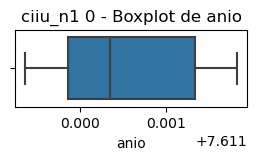

ciiu_n1 0 - PIB_porcentual tiene 0 outliers


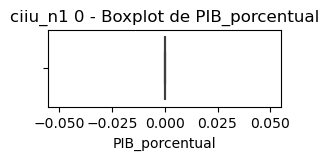

ciiu_n1 0 - PIB_miles tiene 209 outliers


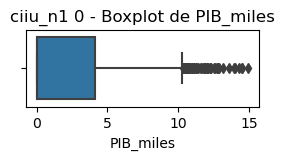

ciiu_n1 0 - activos tiene 23 outliers


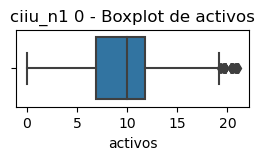

ciiu_n1 0 - patrimonio tiene 1074 outliers


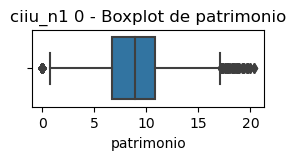

ciiu_n1 0 - n_empleados tiene 5586 outliers


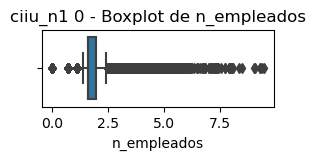

ciiu_n1 0 - ingresos_totales tiene 0 outliers


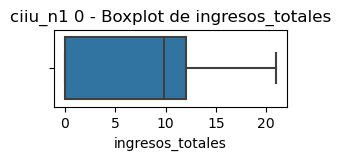

ciiu_n1 0 - utilidad_ejercicio tiene 19 outliers


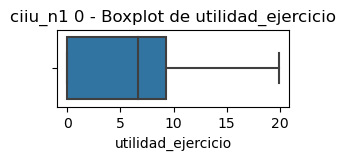

ciiu_n1 0 - utilidad_neta tiene 24 outliers


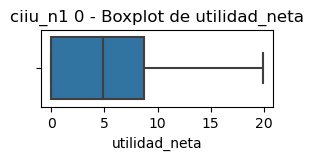

ciiu_n1 0 - Ahorro_bruto tiene 239 outliers


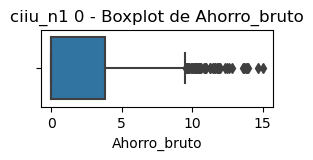

ciiu_n1 0 - Balanza_comercial tiene 2730 outliers


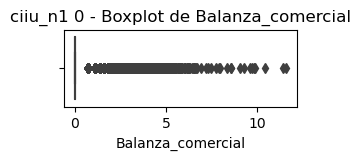

ciiu_n1 0 - Crecimiento_PIB tiene 1536 outliers


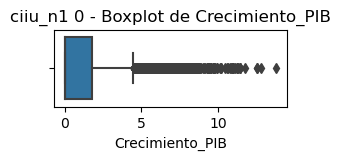

ciiu_n1 0 - Credito_interno tiene 206 outliers


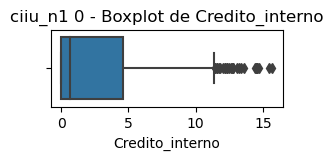

ciiu_n1 0 - Desempleo tiene 827 outliers


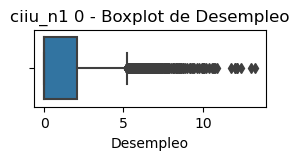

ciiu_n1 0 - Exportaciones tiene 227 outliers


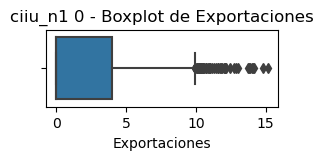

ciiu_n1 0 - Tipo_cambio tiene 4775 outliers


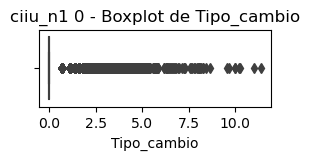

ciiu_n1 0 - Gasto tiene 197 outliers


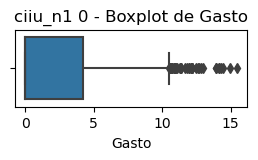

ciiu_n1 0 - Importaciones tiene 228 outliers


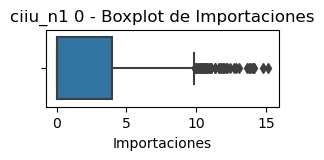

ciiu_n1 0 - Impuestos tiene 229 outliers


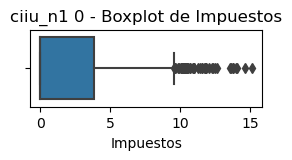

ciiu_n1 0 - IGC tiene 197 outliers


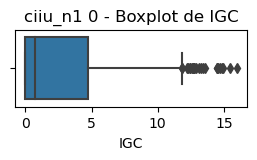

ciiu_n1 0 - Inflacion tiene 4092 outliers


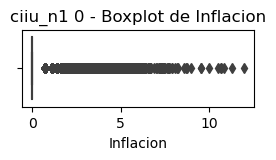

ciiu_n1 0 - Ingreso_Ventas tiene 152 outliers


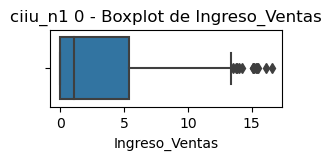

ciiu_n1 0 - Inversion_extranjera tiene 2886 outliers


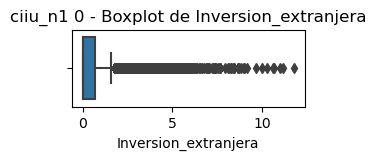

ciiu_n1 0 - Inversiones tiene 401 outliers


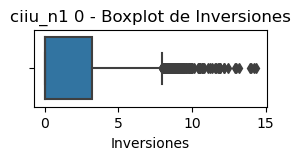

ciiu_n1 0 - Remesas tiene 936 outliers


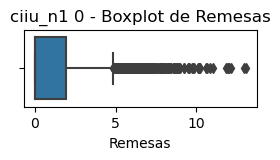

ciiu_n1 0 - Tasa_interes tiene 876 outliers


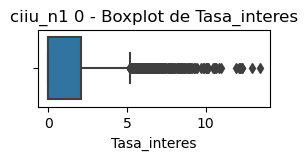

ciiu_n1 0 - liquidez_corriente tiene 1343 outliers


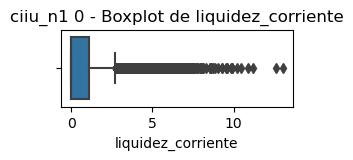

ciiu_n1 0 - prueba_acida tiene 1290 outliers


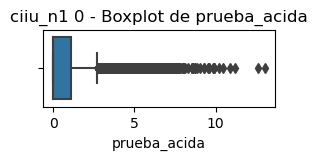

ciiu_n1 0 - end_activo tiene 2317 outliers


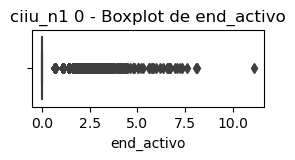

ciiu_n1 0 - end_patrimonial tiene 1545 outliers


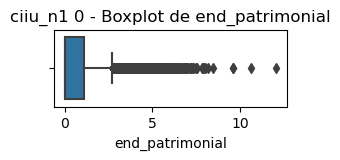

ciiu_n1 0 - end_activo_fijo tiene 2920 outliers


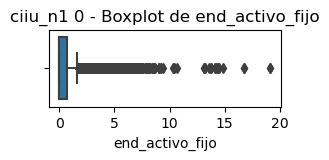

ciiu_n1 0 - end_corto_plazo tiene 1 outliers


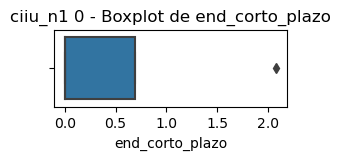

ciiu_n1 0 - end_largo_plazo tiene 372 outliers


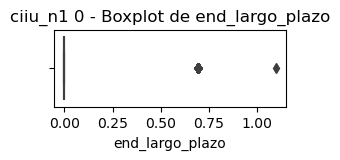

ciiu_n1 0 - cobertura_interes tiene 2893 outliers


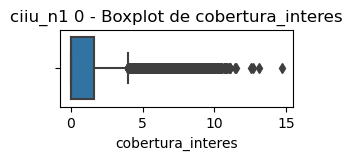

ciiu_n1 0 - apalancamiento tiene 2047 outliers


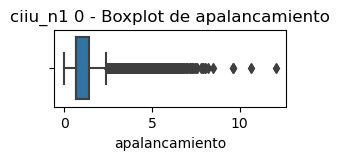

ciiu_n1 0 - apalancamiento_financiero tiene 1314 outliers


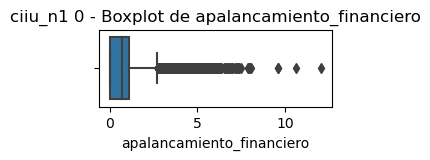

ciiu_n1 0 - end_patrimonial_ct tiene 5028 outliers


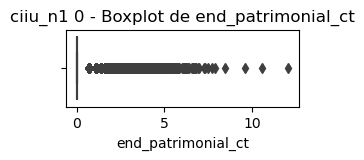

ciiu_n1 0 - end_patrimonial_nct tiene 1295 outliers


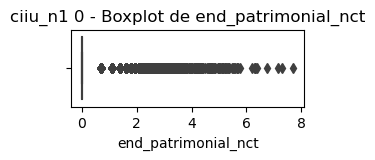

ciiu_n1 0 - apalancamiento_c_l_plazo tiene 2146 outliers


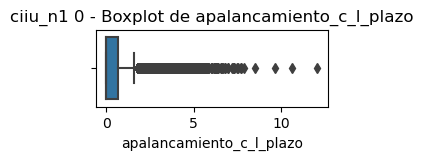

ciiu_n1 0 - rot_cartera tiene 1066 outliers


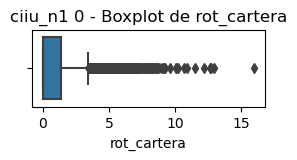

ciiu_n1 0 - rot_activo_fijo tiene 2736 outliers


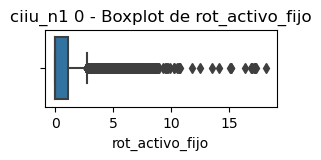

ciiu_n1 0 - rot_ventas tiene 1036 outliers


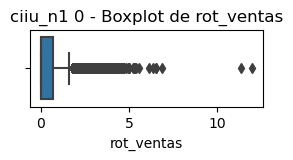

ciiu_n1 0 - per_med_cobranza tiene 738 outliers


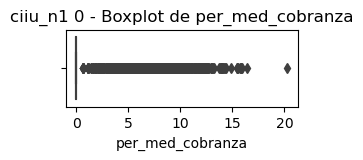

ciiu_n1 0 - per_med_pago tiene 927 outliers


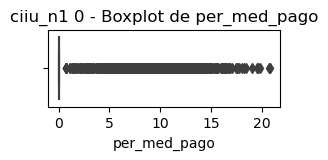

ciiu_n1 0 - impac_gasto_a_v tiene 584 outliers


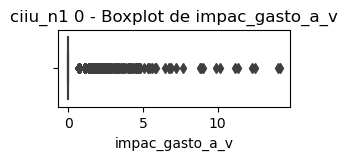

ciiu_n1 0 - impac_carga_finan tiene 66 outliers


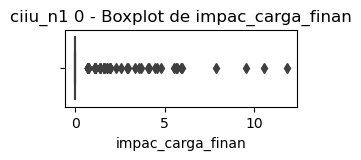

ciiu_n1 0 - rent_neta_activo tiene 4024 outliers


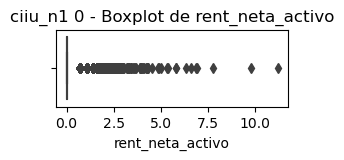

ciiu_n1 0 - margen_bruto tiene 29 outliers


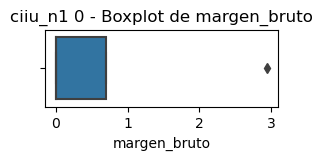

ciiu_n1 0 - margen_operacional tiene 927 outliers


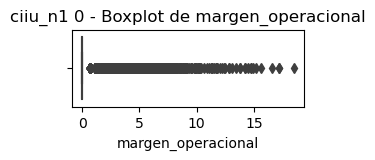

ciiu_n1 0 - rent_neta_ventas tiene 691 outliers


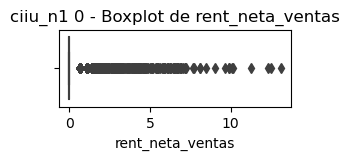

ciiu_n1 0 - rent_ope_patrimonio tiene 3419 outliers


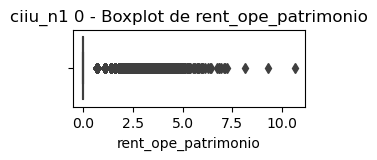

ciiu_n1 0 - rent_ope_activo tiene 1860 outliers


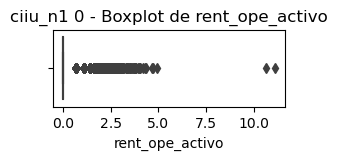

ciiu_n1 0 - roe tiene 5136 outliers


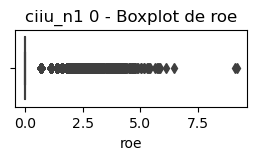

ciiu_n1 0 - roa tiene 4142 outliers


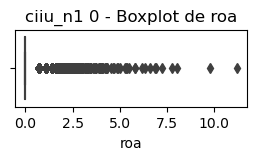

ciiu_n1 0 - fortaleza_patrimonial tiene 295 outliers


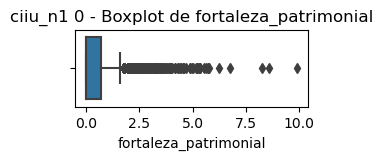

ciiu_n1 0 - gastos_financieros tiene 82 outliers


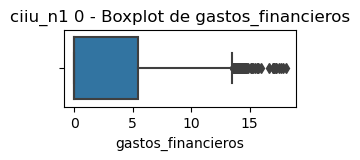

ciiu_n1 0 - gastos_admin_ventas tiene 0 outliers


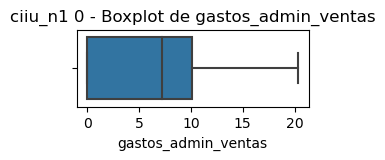

ciiu_n1 0 - depreciaciones tiene 10 outliers


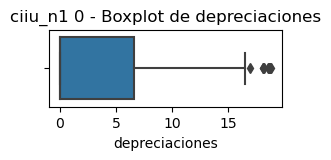

ciiu_n1 0 - amortizaciones tiene 1230 outliers


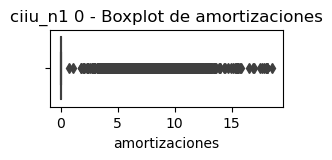

ciiu_n1 0 - costos_ventas_prod tiene 5140 outliers


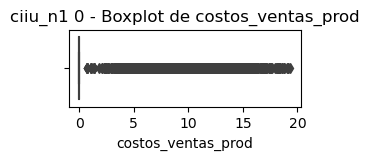

ciiu_n1 0 - deuda_total tiene 4352 outliers


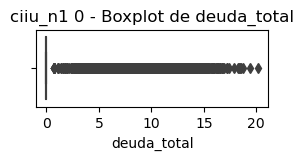

ciiu_n1 0 - deuda_total_c_plazo tiene 3183 outliers


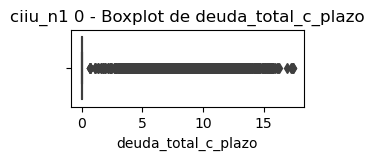

ciiu_n1 0 - total_gastos tiene 0 outliers


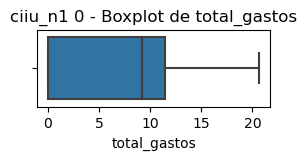

ciiu_n1 1 - anio tiene 0 outliers


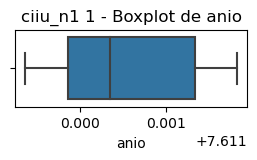

ciiu_n1 1 - PIB_porcentual tiene 0 outliers


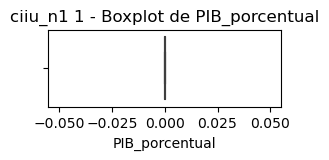

ciiu_n1 1 - PIB_miles tiene 91 outliers


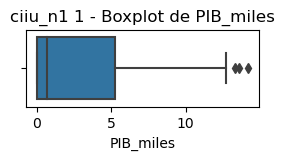

ciiu_n1 1 - activos tiene 318 outliers


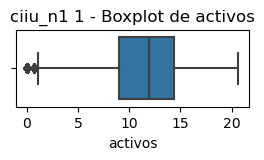

ciiu_n1 1 - patrimonio tiene 0 outliers


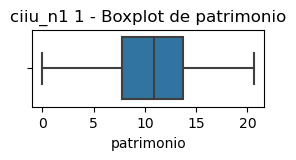

ciiu_n1 1 - n_empleados tiene 969 outliers


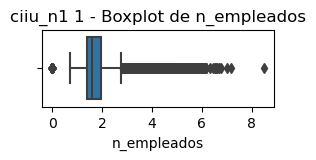

ciiu_n1 1 - ingresos_totales tiene 0 outliers


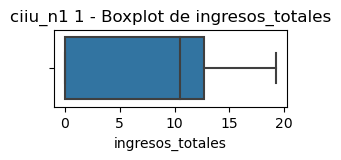

ciiu_n1 1 - utilidad_ejercicio tiene 21 outliers


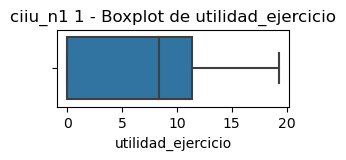

ciiu_n1 1 - utilidad_neta tiene 22 outliers


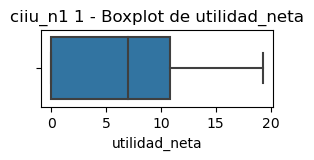

ciiu_n1 1 - Ahorro_bruto tiene 133 outliers


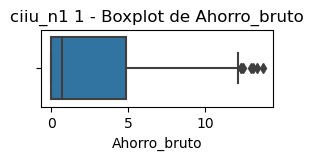

ciiu_n1 1 - Balanza_comercial tiene 1339 outliers


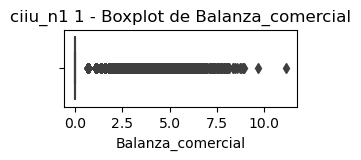

ciiu_n1 1 - Crecimiento_PIB tiene 1188 outliers


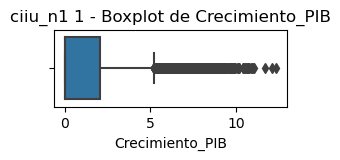

ciiu_n1 1 - Credito_interno tiene 94 outliers


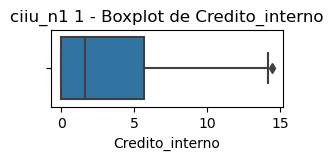

ciiu_n1 1 - Desempleo tiene 542 outliers


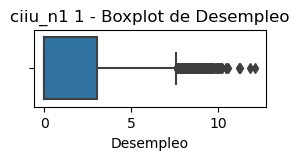

ciiu_n1 1 - Exportaciones tiene 115 outliers


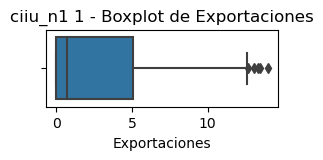

ciiu_n1 1 - Tipo_cambio tiene 1579 outliers


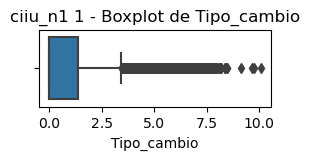

ciiu_n1 1 - Gasto tiene 109 outliers


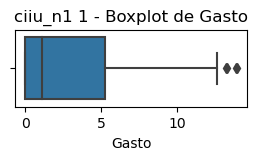

ciiu_n1 1 - Importaciones tiene 122 outliers


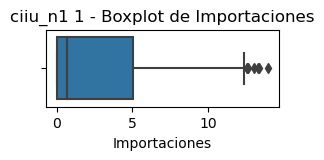

ciiu_n1 1 - Impuestos tiene 134 outliers


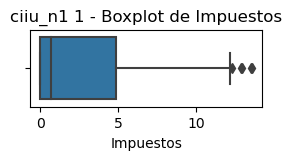

ciiu_n1 1 - IGC tiene 95 outliers


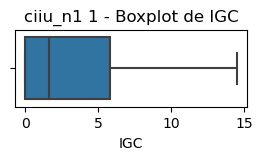

ciiu_n1 1 - Inflacion tiene 1758 outliers


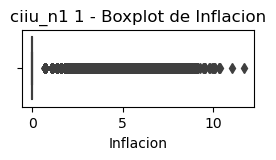

ciiu_n1 1 - Ingreso_Ventas tiene 77 outliers


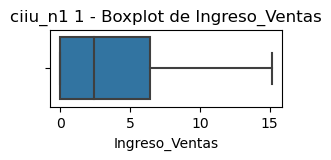

ciiu_n1 1 - Inversion_extranjera tiene 1686 outliers


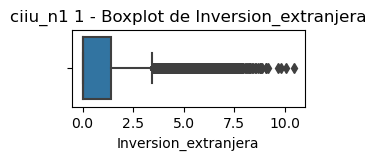

ciiu_n1 1 - Inversiones tiene 216 outliers


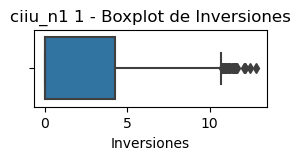

ciiu_n1 1 - Remesas tiene 601 outliers


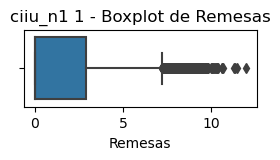

ciiu_n1 1 - Tasa_interes tiene 490 outliers


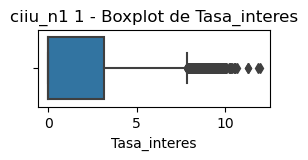

ciiu_n1 1 - liquidez_corriente tiene 1146 outliers


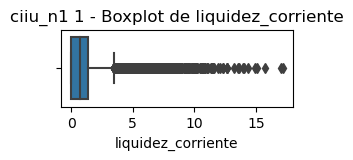

ciiu_n1 1 - prueba_acida tiene 1145 outliers


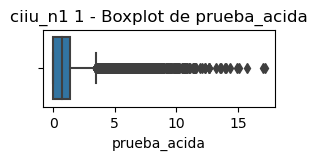

ciiu_n1 1 - end_activo tiene 667 outliers


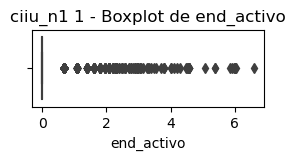

ciiu_n1 1 - end_patrimonial tiene 976 outliers


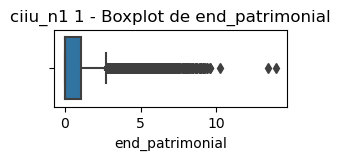

ciiu_n1 1 - end_activo_fijo tiene 1564 outliers


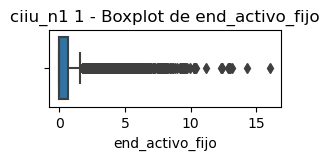

ciiu_n1 1 - end_corto_plazo tiene 0 outliers


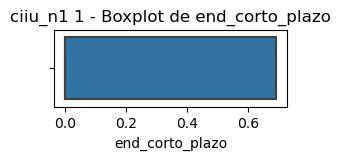

ciiu_n1 1 - end_largo_plazo tiene 528 outliers


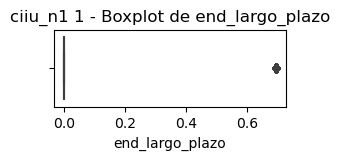

ciiu_n1 1 - cobertura_interes tiene 842 outliers


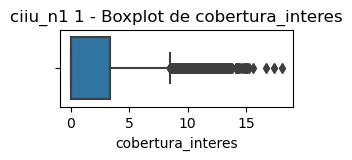

ciiu_n1 1 - apalancamiento tiene 2559 outliers


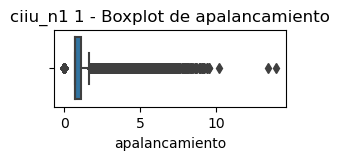

ciiu_n1 1 - apalancamiento_financiero tiene 701 outliers


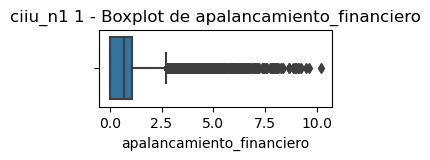

ciiu_n1 1 - end_patrimonial_ct tiene 1872 outliers


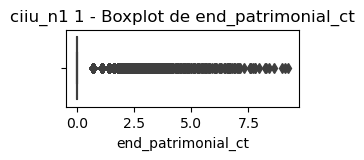

ciiu_n1 1 - end_patrimonial_nct tiene 919 outliers


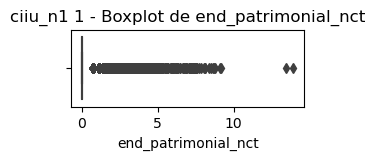

ciiu_n1 1 - apalancamiento_c_l_plazo tiene 2616 outliers


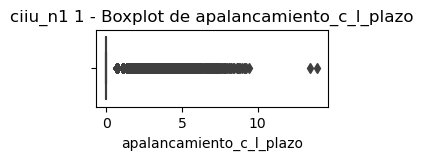

ciiu_n1 1 - rot_cartera tiene 2184 outliers


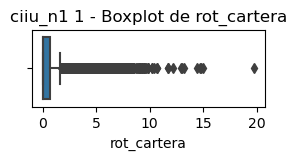

ciiu_n1 1 - rot_activo_fijo tiene 1960 outliers


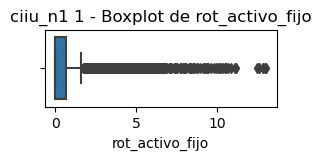

ciiu_n1 1 - rot_ventas tiene 365 outliers


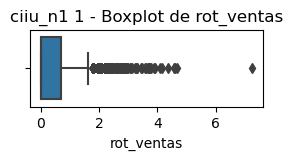

ciiu_n1 1 - per_med_cobranza tiene 398 outliers


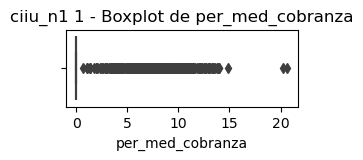

ciiu_n1 1 - per_med_pago tiene 148 outliers


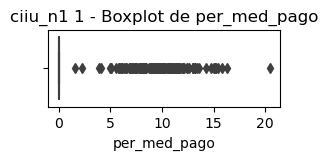

ciiu_n1 1 - impac_gasto_a_v tiene 315 outliers


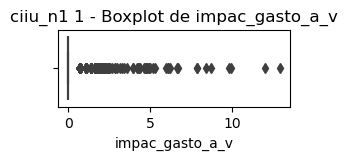

ciiu_n1 1 - impac_carga_finan tiene 79 outliers


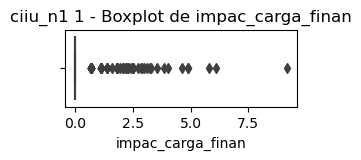

ciiu_n1 1 - rent_neta_activo tiene 1862 outliers


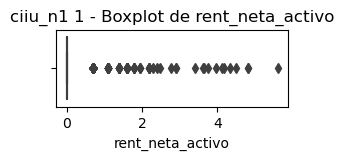

ciiu_n1 1 - margen_bruto tiene 4 outliers


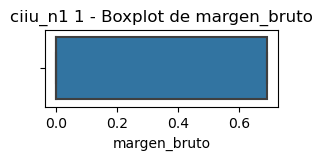

ciiu_n1 1 - margen_operacional tiene 720 outliers


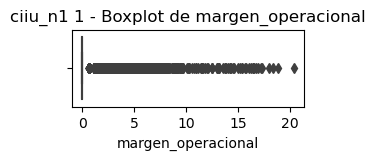

ciiu_n1 1 - rent_neta_ventas tiene 383 outliers


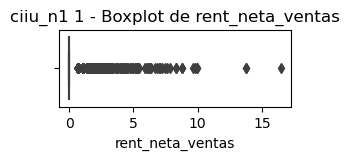

ciiu_n1 1 - rent_ope_patrimonio tiene 1572 outliers


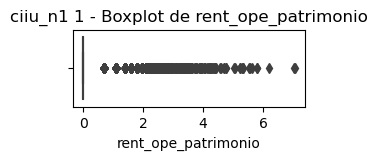

ciiu_n1 1 - rent_ope_activo tiene 834 outliers


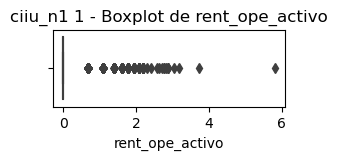

ciiu_n1 1 - roe tiene 2271 outliers


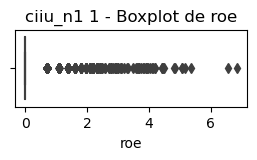

ciiu_n1 1 - roa tiene 1888 outliers


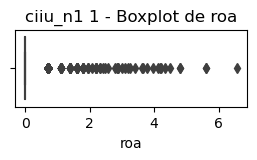

ciiu_n1 1 - fortaleza_patrimonial tiene 148 outliers


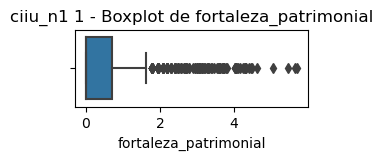

ciiu_n1 1 - gastos_financieros tiene 23 outliers


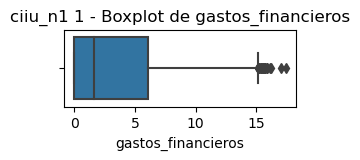

ciiu_n1 1 - gastos_admin_ventas tiene 0 outliers


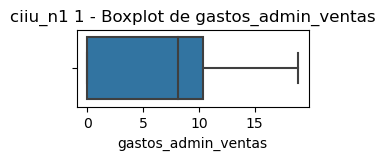

ciiu_n1 1 - depreciaciones tiene 0 outliers


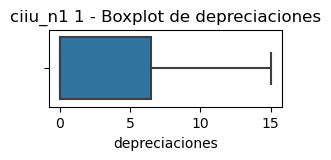

ciiu_n1 1 - amortizaciones tiene 809 outliers


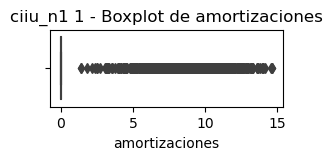

ciiu_n1 1 - costos_ventas_prod tiene 538 outliers


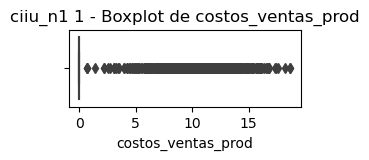

ciiu_n1 1 - deuda_total tiene 2058 outliers


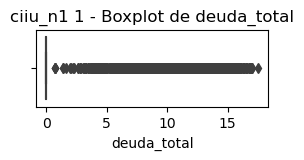

ciiu_n1 1 - deuda_total_c_plazo tiene 1414 outliers


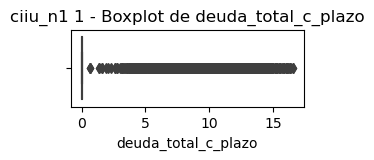

ciiu_n1 1 - total_gastos tiene 0 outliers


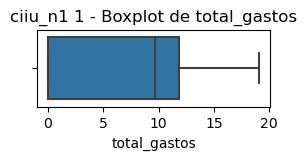

In [13]:
def detectar_outliers_por_ciiu_n1(df, ciiu_n1_valor):
    df_ciiu_n1 = df[df['ciiu_n1'] == ciiu_n1_valor]
    
    for columna in df_ciiu_n1.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_ciiu_n1[columna].quantile(0.25)
        Q3 = df_ciiu_n1[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Calcular el número de outliers
        outliers = df_ciiu_n1[(df_ciiu_n1[columna] < limite_inferior) | (df_ciiu_n1[columna] > limite_superior)][columna]
        print(f"ciiu_n1 {ciiu_n1_valor} - {columna} tiene {outliers.count()} outliers")
        
        # Visualización de outliers con boxplot
        plt.figure(figsize=(3, 1))
        sns.boxplot(x=df_ciiu_n1[columna])
        plt.title(f'ciiu_n1 {ciiu_n1_valor} - Boxplot de {columna}')
        plt.show()

ciiu_n1_valores = [0, 1]

for valor in ciiu_n1_valores:
    detectar_outliers_por_ciiu_n1(df, valor)

Correlación para ciiu_n1 = 0


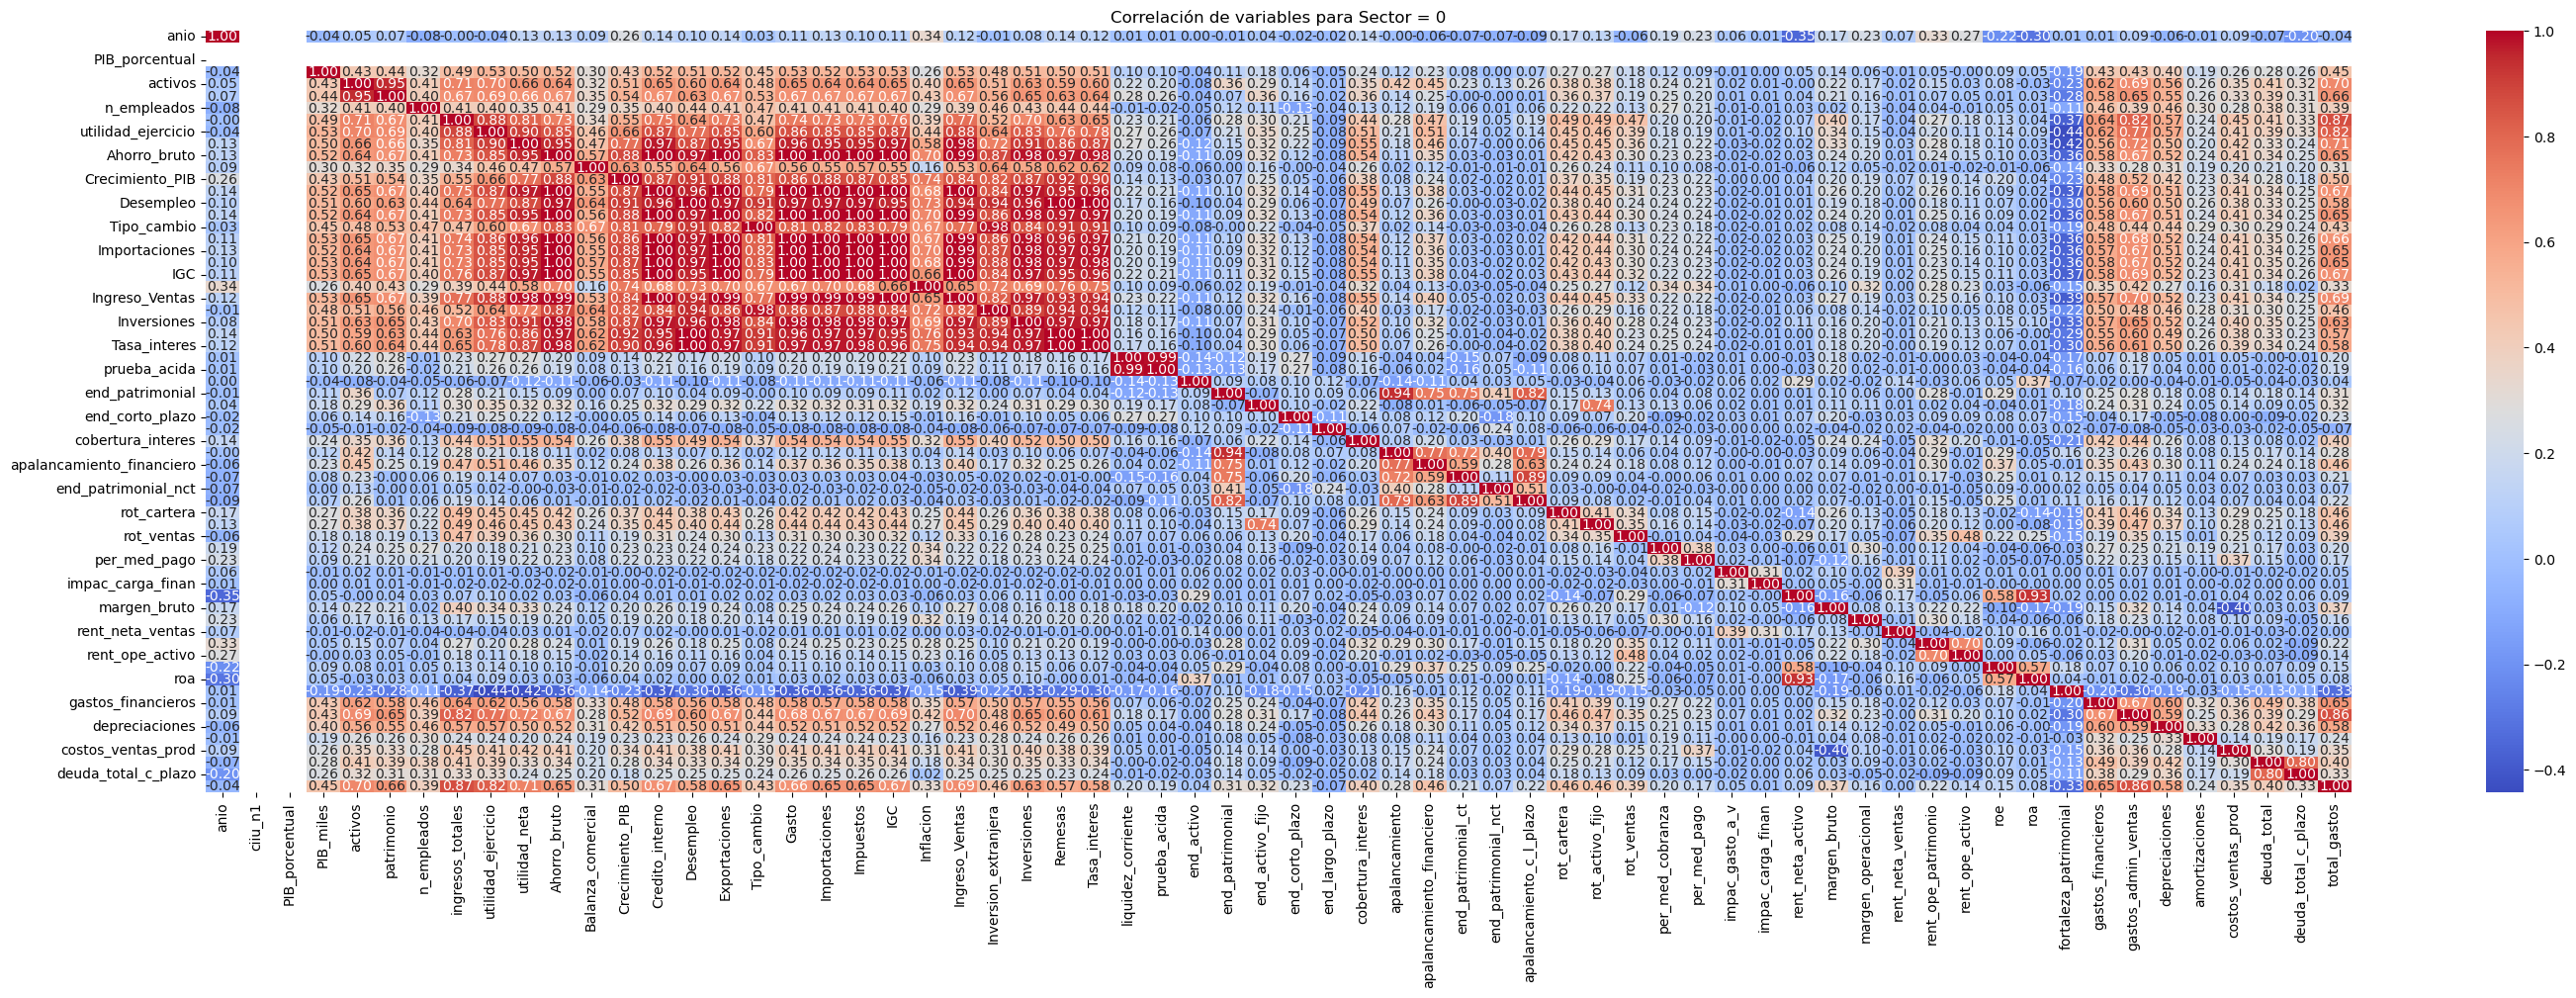

Correlación para ciiu_n1 = 1


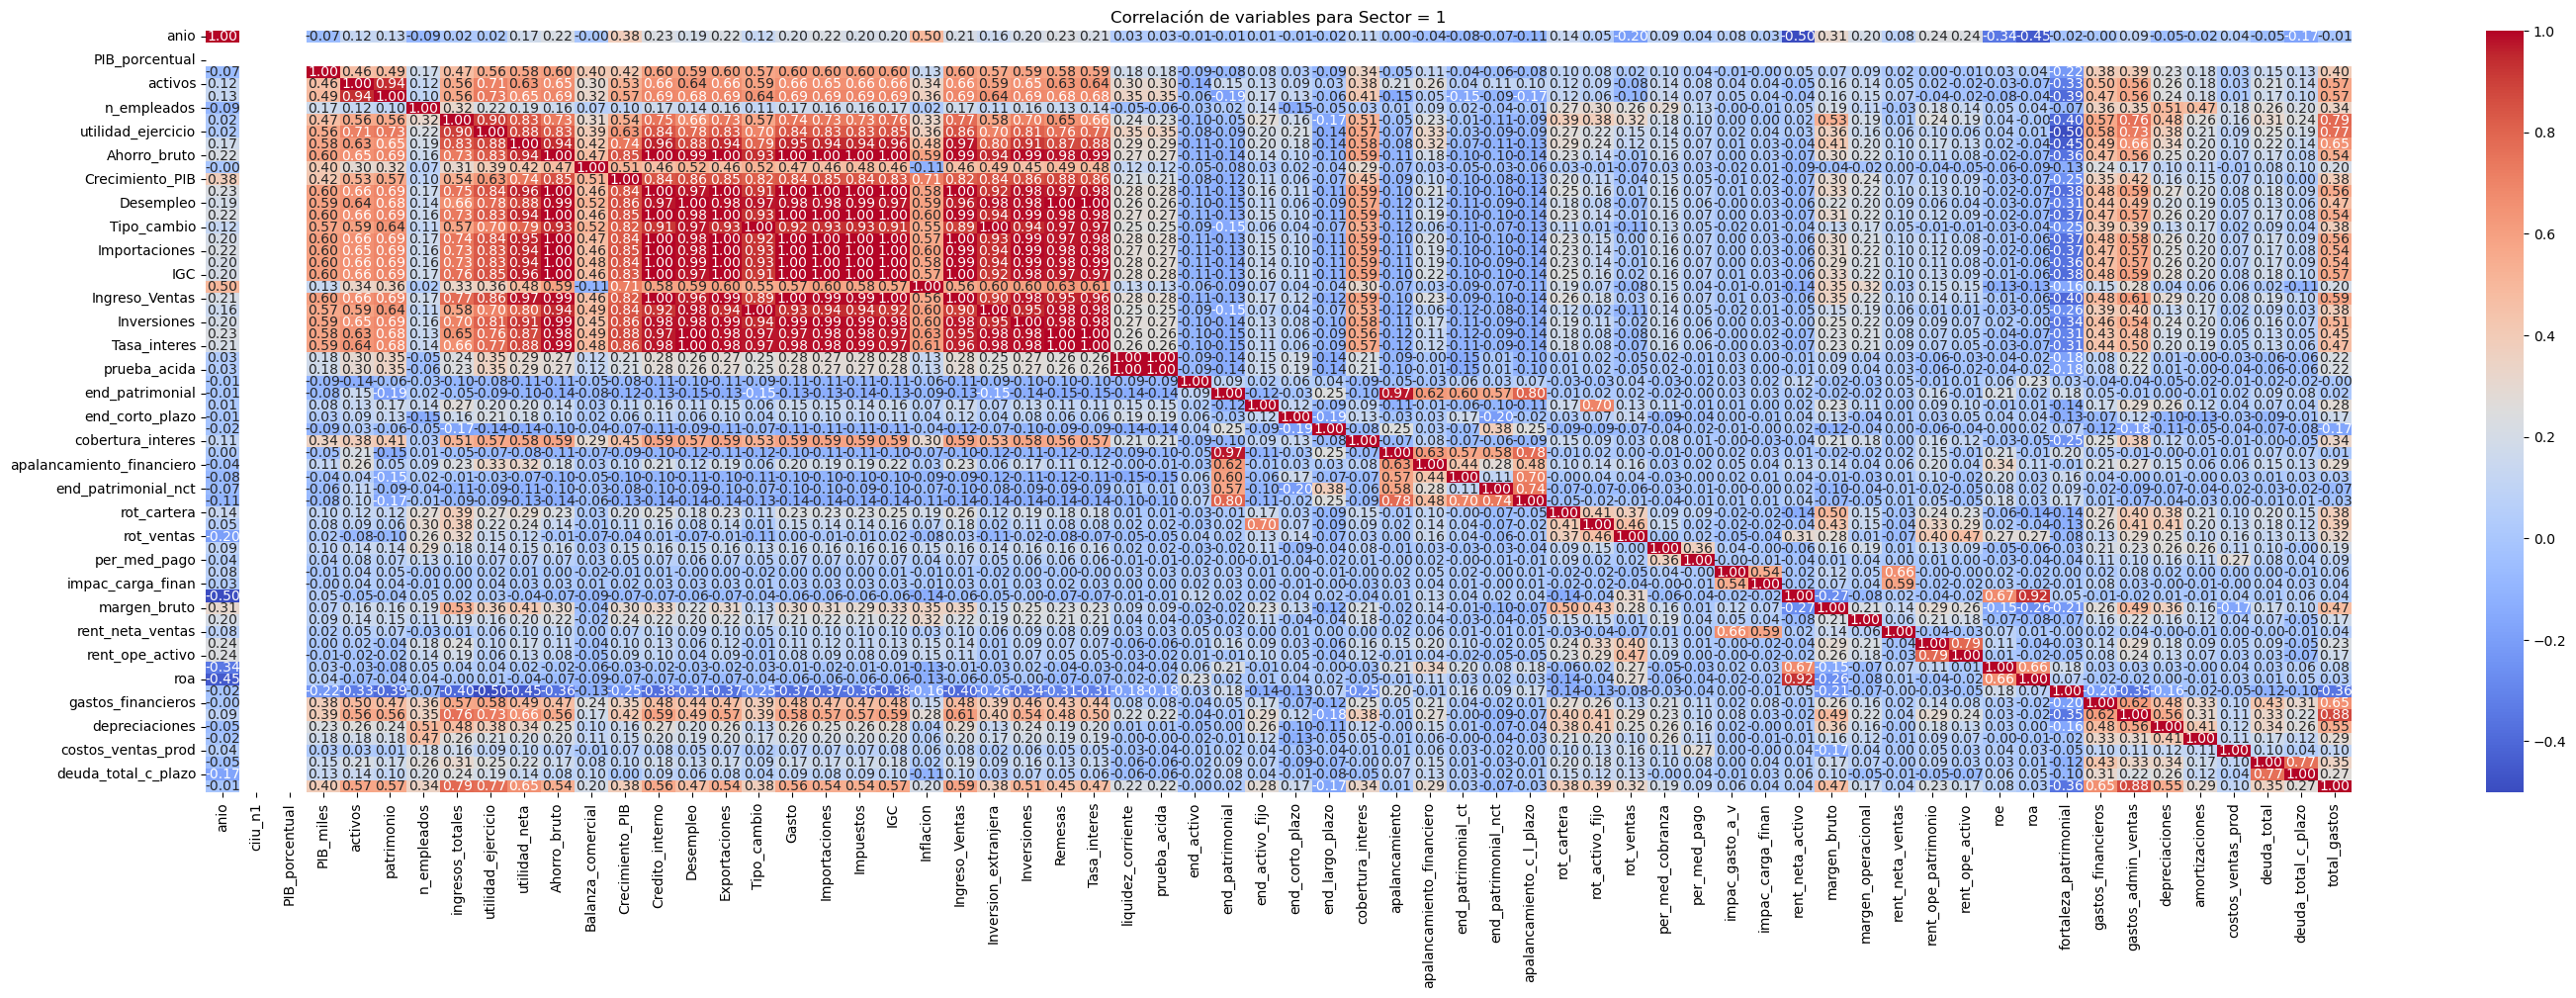

In [14]:
def calcular_correlacion(df, ciiu_n1_valor):
    df_filtered = df[df['ciiu_n1'] == ciiu_n1_valor]
    correlation_matrix = df_filtered.corr()
    
    plt.figure(figsize=(35, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(f'Correlación de variables para Sector = {ciiu_n1_valor}')
    plt.show()

ciiu_n1_valores = [0, 1]

for valor in ciiu_n1_valores:
    print(f"Correlación para ciiu_n1 = {valor}")
    calcular_correlacion(df, valor)


Matriz de correlación para ciiu_n1 = 0


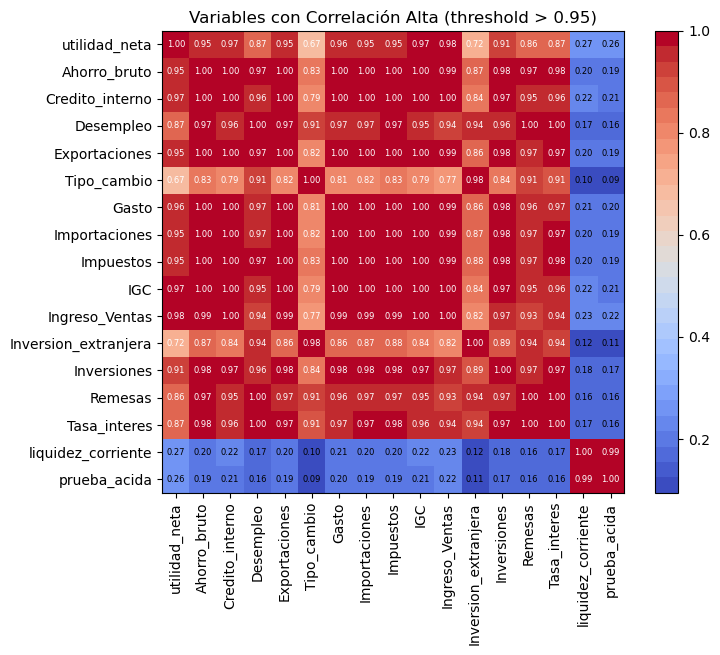

Matriz de correlación para ciiu_n1 = 1


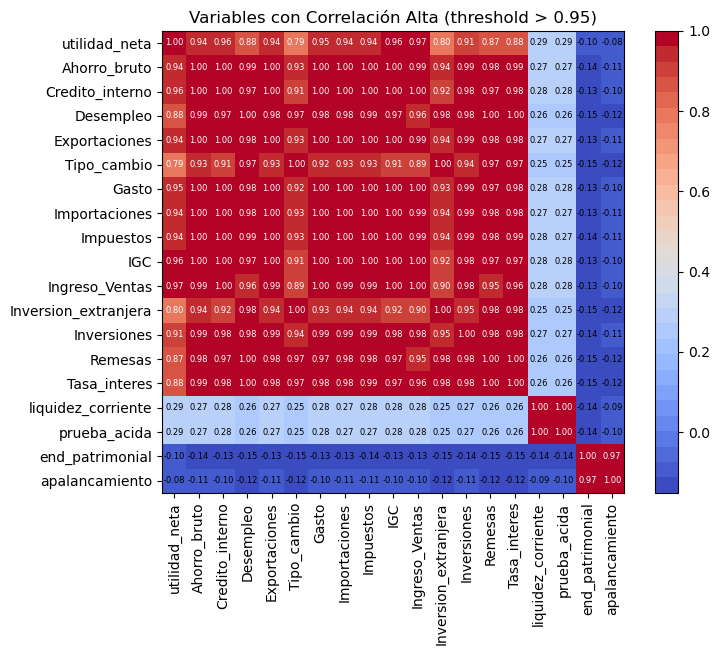

In [15]:
threshold = 0.95
def calcular_correlacion(df, ciiu_n1_valor):
    df_filtered = df[df['ciiu_n1'] == ciiu_n1_valor]
    correlation_matrix = df_filtered[variables_numericas].corr()
    return correlation_matrix

def plot_high_correlations(matriz_correlacion, threshold):
    plt.figure(figsize=(8, 6))
    plt.title(f"Variables con Correlación Alta (threshold > {threshold})")
    
    high_correlations = (matriz_correlacion.abs() > threshold) & (matriz_correlacion != 1)
    high_corr_columns = [col for col in high_correlations.columns if any(high_correlations[col])]
    
    if len(high_corr_columns) == 0:
        print("No hay variables con correlación mayor al umbral.")
        return
    
    high_corr_values = matriz_correlacion.loc[high_corr_columns, high_corr_columns]
    
    cmap = plt.get_cmap('coolwarm', 30)
    plt.imshow(high_corr_values, interpolation='none', cmap=cmap)
    
    for i in range(len(high_corr_values)):
        for j in range(len(high_corr_values)):
            plt.text(j, i, "{:.2f}".format(high_corr_values.iloc[i, j]),
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=6,
                     color='white' if high_corr_values.iloc[i, j] > 0.5 else 'black')
    
    plt.xticks(range(len(high_corr_values.columns)), high_corr_values.columns, rotation=90)
    plt.yticks(range(len(high_corr_values.index)), high_corr_values.index)
    
    plt.colorbar()

    plt.show()

ciiu_n1_valores = [0, 1]  # Reemplaza estos valores con los valores deseados

# Calcular y mostrar la matriz de correlación y el gráfico para cada valor de ciiu_n1
for valor in ciiu_n1_valores:
    print(f"Matriz de correlación para ciiu_n1 = {valor}")
    matriz_correlacion = calcular_correlacion(df, valor)
    plot_high_correlations(matriz_correlacion, threshold)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
 
def realizar_regresion(X_train, y_train, X_test, y_test, ciiu_n1_valor, variables_independientes, variable_dependiente):
    # Añadir la constante (intercepto)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    # Ajustar el modelo de regresión
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    # Mostrar el resumen del modelo
    print(f"Resultados para ciiu_n1 = {ciiu_n1_valor} con variables independientes: {variables_independientes} y variable dependiente = '{variable_dependiente}':")
    print(results.summary())
    # Realizar predicciones y calcular errores en el conjunto de prueba
    y_pred = results.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    return results
 
variables_independientes = ['Ahorro_bruto', 'Credito_interno', 'Desempleo', 'Exportaciones', 'Gasto', 'Importaciones', 
                            'Impuestos', 'IGC', 'Ingreso_Ventas', 'Inversion_extranjera', 'Inversiones', 'Remesas', 'Tasa_interes']
var_dependiente = 'utilidad_neta'
 
# Filtrar por sector y dividir los datos en entrenamiento y prueba
for valor_ciiu_n1 in [0, 1]:
    df_ciiu_n1 = df[df['ciiu_n1'] == valor_ciiu_n1]
    X = df_ciiu_n1[variables_independientes]
    y = df_ciiu_n1[var_dependiente]
    # Reemplazar valores NaN e infinitos por 0 (o cualquier otro valor que consideres adecuado)
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    y = y.replace([np.inf, -np.inf], np.nan).fillna(0)
    # Verificar que no hay valores NaN o infinitos después del reemplazo
    if X.isnull().any().any() or not np.isfinite(X).all().all():
        raise ValueError("Existen valores NaN o infinitos en X después del reemplazo")
    if y.isnull().any() or not np.isfinite(y).all():
        raise ValueError("Existen valores NaN o infinitos en y después del reemplazo")
 
    # Añadir la constante (intercepto) antes de dividir los datos
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Realizar la regresión en el conjunto de entrenamiento
    results = realizar_regresion(X_train, y_train, X_test, y_test, valor_ciiu_n1, variables_independientes, var_dependiente)

Resultados para ciiu_n1 = 0 con variables independientes: ['Ahorro_bruto', 'Credito_interno', 'Desempleo', 'Exportaciones', 'Gasto', 'Importaciones', 'Impuestos', 'IGC', 'Ingreso_Ventas', 'Inversion_extranjera', 'Inversiones', 'Remesas', 'Tasa_interes'] y variable dependiente = 'utilidad_neta':
                            OLS Regression Results                            
Dep. Variable:          utilidad_neta   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.076e+05
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:49:50   Log-Likelihood:                -4601.9
No. Observations:               14944   AIC:                             9232.
Df Residuals:                   14930   BIC:                             9338.
Df Model:                          13                                   

# 1. Heterocedasticidad

In [17]:
import statsmodels.stats.api as sms
 
_, pval, _, _ = sms.het_breuschpagan(results.resid, results.model.exog)
print(f"Prueba de Breusch-Pagan p-value: {pval}")

Prueba de Breusch-Pagan p-value: 3.319562167461114e-13


# 2. Normalidad de los residuos

<Figure size 1000x600 with 0 Axes>

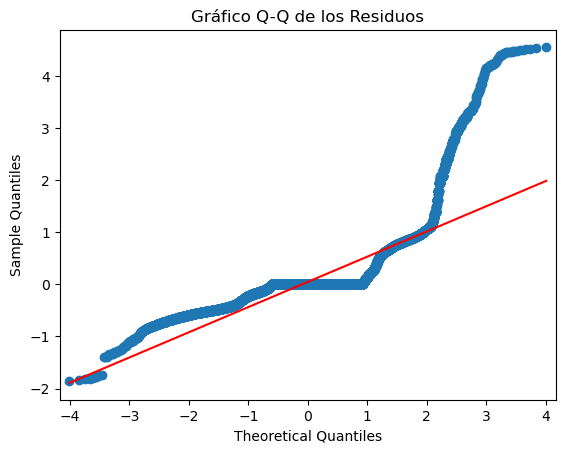

Prueba de Shapiro-Wilk: Estadístico=0.6461207334112221, p-Valor=1.6104426415415145e-120
Prueba de Kolmogorov-Smirnov: Estadístico=0.31848671976029197, p-Valor=0.0
Prueba de Anderson-Darling: Estadístico=3728.1287779294507, Valores Críticos=[0.576 0.656 0.787 0.918 1.092]
Prueba de Jarque-Bera: Estadístico=727665.6294354467, p-Valor=0.0


In [29]:
# Gráfico Q-Q
plt.figure(figsize=(10, 6))
sm.qqplot(residuos, line='s')
plt.title('Gráfico Q-Q de los Residuos')
plt.show()
 
# Pruebas estadísticas
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f'Prueba de Shapiro-Wilk: Estadístico={shapiro_test[0]}, p-Valor={shapiro_test[1]}')
 
# Prueba de Kolmogorov-Smirnov
ks_test = stats.kstest(residuos, 'norm')
print(f'Prueba de Kolmogorov-Smirnov: Estadístico={ks_test[0]}, p-Valor={ks_test[1]}')
 
# Prueba de Anderson-Darling
ad_test = stats.anderson(residuos, dist='norm')
print(f'Prueba de Anderson-Darling: Estadístico={ad_test.statistic}, Valores Críticos={ad_test.critical_values}')
 
# Prueba de Jarque-Bera
jb_test = stats.jarque_bera(residuos)
print(f'Prueba de Jarque-Bera: Estadístico={jb_test[0]}, p-Valor={jb_test[1]}')

# 3. Autocorrelacion

In [19]:
from statsmodels.stats.stattools import durbin_watson
 
# Realizar la prueba de Durbin-Watson
dw_test = durbin_watson(results.resid)
print(f"Prueba de Durbin-Watson: {dw_test}")

Prueba de Durbin-Watson: 2.0118813207687345


# 4. Validación Cruzada

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
 
# Preparar los datos
X = df[variables_independientes].replace([np.inf, -np.inf], np.nan).fillna(0)
y = df[var_dependiente].replace([np.inf, -np.inf], np.nan).fillna(0)
 
# Inicializar el modelo
model = LinearRegression()
 
# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Scores de validación cruzada: {scores}")
print(f"Media de los scores de validación cruzada: {scores.mean()}")

Scores de validación cruzada: [0.98914695 0.99060032 0.99115378 0.98917612 0.99101641]
Media de los scores de validación cruzada: 0.9902187164744344


# Grafico Telecomunicaciones

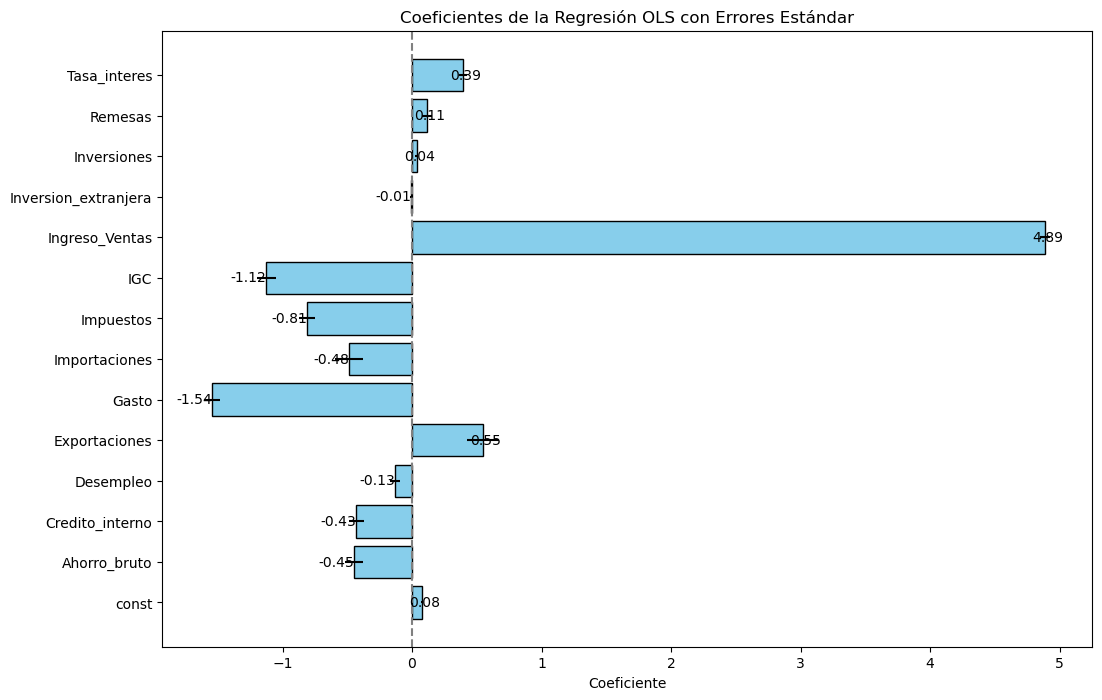

In [22]:
import matplotlib.pyplot as plt
import numpy as np
 
# Datos de la regresión
variables = ['const', 'Ahorro_bruto', 'Credito_interno', 'Desempleo', 'Exportaciones', 'Gasto', 
             'Importaciones', 'Impuestos', 'IGC', 'Ingreso_Ventas', 'Inversion_extranjera', 
             'Inversiones', 'Remesas', 'Tasa_interes']
coeficientes = [0.0757, -0.4478, -0.4319, -0.1316, 0.5471, -1.5433, 
                -0.4841, -0.8110, -1.1250, 4.8879, -0.0068, 0.0351, 0.1142, 0.3936]
error_estandar = [0.004, 0.071, 0.058, 0.035, 0.122, 0.059, 
                  0.108, 0.064, 0.071, 0.037, 0.012, 0.010, 0.038, 0.033]
 
# Crear el gráfico de barras con barras de error
plt.figure(figsize=(12, 8))
bars = plt.barh(variables, coeficientes, xerr=error_estandar, color='skyblue', edgecolor='black')
plt.xlabel('Coeficiente')
plt.title('Coeficientes de la Regresión OLS con Errores Estándar')
plt.axvline(x=0, color='grey', linestyle='--')
 
# Añadir los valores de los coeficientes en las barras
for bar, coef in zip(bars, coeficientes):
    plt.text(bar.get_width() if coef < 0 else bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, 
             f'{coef:.2f}', va='center', ha='right' if coef < 0 else 'left', color='black')
 
plt.show()

# Grafico Seguros

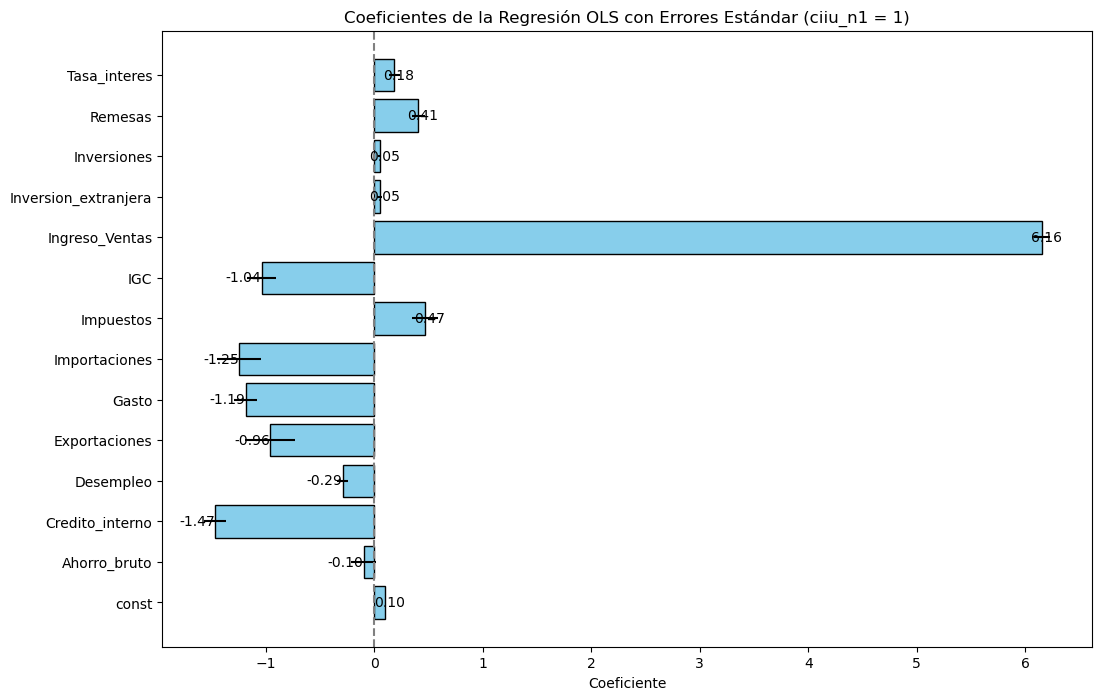

In [24]:
variables = ['const', 'Ahorro_bruto', 'Credito_interno', 'Desempleo', 'Exportaciones', 'Gasto', 
             'Importaciones', 'Impuestos', 'IGC', 'Ingreso_Ventas', 'Inversion_extranjera', 
             'Inversiones', 'Remesas', 'Tasa_interes']
coeficientes = [0.0994, -0.1003, -1.4684, -0.2944, -0.9633, -1.1888, 
                -1.2469, 0.4650, -1.0408, 6.1561, 0.0476, 0.0464, 0.4053, 0.1829]
error_estandar = [0.007, 0.113, 0.099, 0.054, 0.228, 0.104, 
                  0.203, 0.119, 0.132, 0.072, 0.025, 0.016, 0.062, 0.052]
 
# Crear el gráfico de barras con barras de error
plt.figure(figsize=(12, 8))
bars = plt.barh(variables, coeficientes, xerr=error_estandar, color='skyblue', edgecolor='black')
plt.xlabel('Coeficiente')
plt.title('Coeficientes de la Regresión OLS con Errores Estándar (ciiu_n1 = 1)')
plt.axvline(x=0, color='grey', linestyle='--')
 
# Añadir los valores de los coeficientes en las barras
for bar, coef in zip(bars, coeficientes):
    plt.text(bar.get_width() if coef < 0 else bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, 
             f'{coef:.2f}', va='center', ha='right' if coef < 0 else 'left', color='black')
 
plt.show()